## <font face="微软雅黑"><center>《机器学习》</center></font>


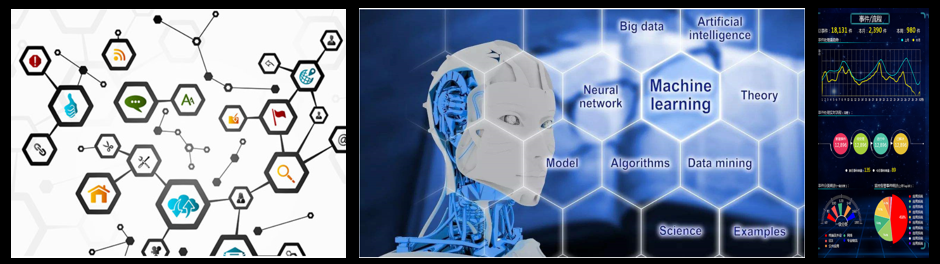

#  <font color=#0099ff  face="微软雅黑"><center>实验一 电影票房数据统计</center></font>

## 实验要求：
<hr width="100%" style="margin-top:10px;border:0.5px solid black;"/>

### 【实验目的】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> 
通过本次实训，要求初步掌握数据分析过程和Python数据分析常用包：Pandas、matplotlib的基本使用。
</div>

### 【实验环境】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> Anaconda环境、Pandas、NumPy、matplotlib</div>
    
### 【实验内容】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> 
一个完整、充分的前期数据统计过程主要包括以下步骤：
<ol style="margin:0px;">
<li style="text-indent:0px;margin:10px">收集/观察数据；</li>
<li style="text-indent:0px;margin:10px">探索和准备数据；</li>
<li style="text-indent:0px;margin:10px">基于数据统计与分析；</li>
<li style="text-indent:0px;margin:10px">结果的可视展现。</li>
在接下来的实训中，按照以上步骤对数据进行统计。</ol>
</div>

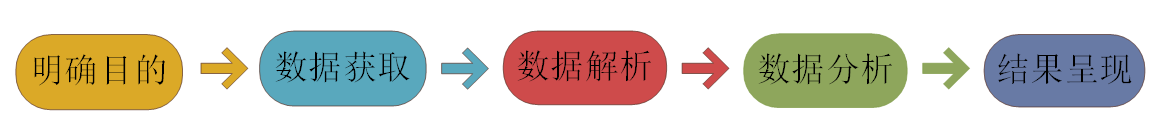

![](./IMG/process.png)

##     本次实验使用的是2010年5月各个电影的票房数据，所有数据存储于文件film.csv中。现需要根据各电影票房数据及其它基本信息，展示某部电影在一定期间内的票房变化趋势和动态预测。

##  <font color='red'  face="微软雅黑">*注意*：所有注释后的空行均需填入代码</font>

## 1.1 数据获取：从本地文件（film.csv）中读取电影原始数据

In [1]:
# 导入包
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")  #忽略告警

In [2]:
# 从从本地文件（film.csv）中读取电影原始数据，并输出前五行数据
film = pd.read_csv('film.csv',names=['date','filmname','BOR'])
film.head()

date filmname      BOR
0   2010-05-09    唐山大地震  51315.0
1   2010-05-16      老男孩   1599.0
2   2010-05-23       剑雨   2224.0
3   2010-05-23       剑雨      NaN
4   2010-05-23      老男孩   1605.0

In [3]:
#查看数据有几行几列
film.shape

(81, 3)

In [4]:
# 一次性查看数据的特征、是否有缺失值、数据类型
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      81 non-null     object 
 1   filmname  81 non-null     object 
 2   BOR       61 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.0+ KB


In [5]:
#查看数据统计特征
film.describe()

BOR
count      61.000000
mean    55895.770492
std     45207.809322
min      1588.000000
25%      2224.000000
50%     51876.000000
75%    102063.000000
max    106652.000000

In [6]:
#take a look at the unique values for each column
#for each column
for c in list (film.columns):
    #get a list of unique values
    n=film[c].unique()
    #in number of unique values is less than 30, print the values. Otherwise print the number of unique values.
    if len(n)<30:
        print(c)
        print(n)
    else:
        print (c+':'+ str(len(n))+'unique values')

date
[' 2010-05-09' ' 2010-05-16' ' 2010-05-23' ' 2010-05-13']
filmname
['唐山大地震' '老男孩' '剑雨' 'X战警-天启' '让子弹飞']
BOR:44unique values


## 1.2 数据解析

### 1.2.1 从数据项中去除票房数据项为空的“脏数据“

In [7]:
# 清洗掉缺失的数据，并查看新的数据集大小
film2 = film.dropna()
film2.shape

(61, 3)

### 1.2.2 从新数据中筛选电影名为“老男孩”的数据

In [8]:
# 筛选电影名为老男孩的数据并输出
oldboy = film2[film2.filmname == '老男孩']
oldboy

date filmname     BOR
1    2010-05-16      老男孩  1599.0
4    2010-05-23      老男孩  1605.0
15   2010-05-16      老男孩  1595.0
32   2010-05-23      老男孩  1595.0
38   2010-05-16      老男孩  1596.0
48   2010-05-16      老男孩  1592.0
50   2010-05-16      老男孩  1611.0
52   2010-05-16      老男孩  1604.0
53   2010-05-16      老男孩  1599.0
59   2010-05-16      老男孩  1607.0
71   2010-05-16      老男孩  1588.0
73   2010-05-16      老男孩  1590.0
76   2010-05-16      老男孩  1606.0
77   2010-05-23      老男孩  1595.0

### 1.2.3 筛选放映日期为2010年05月后半月的电影数据

In [9]:
#获取放映时间，注意date的类型，需将其转换为“datetime”类型
film2['date'] = pd.to_datetime(film2['date'])
film2['date']

0    2010-05-09
1    2010-05-16
2    2010-05-23
4    2010-05-23
5    2010-05-09
        ...    
76   2010-05-16
77   2010-05-23
78   2010-05-23
79   2010-05-13
80   2010-05-09
Name: date, Length: 61, dtype: datetime64[ns]

In [10]:
# 筛选放映时间为5月后半个月的电影数据，并输出前五行
film_date = film2.loc[ (film2['date']> '2010-5-15') & (film2['date'] <= '2010-5-31')]
film_date.head() 

date filmname       BOR
1 2010-05-16      老男孩    1599.0
2 2010-05-23       剑雨    2224.0
4 2010-05-23      老男孩    1605.0
6 2010-05-16   X战警-天启  102063.0
7 2010-05-16   X战警-天启  102364.0

### 1.2.4 筛选票房数据“>1600”的电影且名称为“老男孩”或“剑雨”的数据行。

In [11]:
# 名称为“老男孩”或“剑雨” 且 票房数据“>1600”的电影，并打印前5行数据
film_out = film2[(film2["filmname"].isin(['老男孩','剑雨'])) & (film2['BOR']> 1600)]
film_out.head()

date filmname     BOR
2  2010-05-23       剑雨  2224.0
4  2010-05-23      老男孩  1605.0
10 2010-05-23       剑雨  2246.0
34 2010-05-23       剑雨  2253.0
40 2010-05-23       剑雨  2250.0

## 1.3 数据分析

### 1.3.1 按电影名称统计后半月的票房

In [13]:
# 根据电影名称统计后半月票房并输出结果 
filmgrp_bor = film_date.groupby(['filmname'], as_index= False)['BOR'].sum()
filmgrp_bor.head()

filmname        BOR
0   X战警-天启  1422856.0
1       剑雨    15669.0
2      老男孩    22382.0
3     让子弹飞  1165745.0

### 1.3.2 统计每日的平均票房

In [14]:
# 统计每日的平均票房
filmgrp_bor2 = film2.groupby(['date'], as_index= False)['BOR'].mean()
filmgrp_bor2

date            BOR
0 2010-05-09   48716.500000
1 2010-05-13  100959.000000
2 2010-05-16   69634.696970
3 2010-05-23   25285.153846

### 1.3.4 统计每天放映的电影部数

In [15]:
# 按日期和电影名称去除重复数据项
film_dis = film2.drop_duplicates(['date','filmname'])
film_dis 

date filmname       BOR
0  2010-05-09    唐山大地震   51315.0
1  2010-05-16      老男孩    1599.0
2  2010-05-23       剑雨    2224.0
4  2010-05-23      老男孩    1605.0
6  2010-05-16   X战警-天启  102063.0
16 2010-05-16     让子弹飞  106652.0
29 2010-05-23     让子弹飞  106024.0
35 2010-05-23   X战警-天启  101260.0
79 2010-05-13   X战警-天启  100959.0
80 2010-05-09     让子弹飞   10652.0

In [16]:
# 按日期统计电影部数
filmgrp_cnt = film_dis.groupby(['date'], as_index= False)['filmname'].count()
filmgrp_cnt

date  filmname
0 2010-05-09         2
1 2010-05-13         1
2 2010-05-16         3
3 2010-05-23         4

## 1.4 数据可视化 
### 1.4.1 图形化显示不同电影的票房情况 （注意：默认画出的图形坐标值是科学计数法，请试着将其改为正常显示）

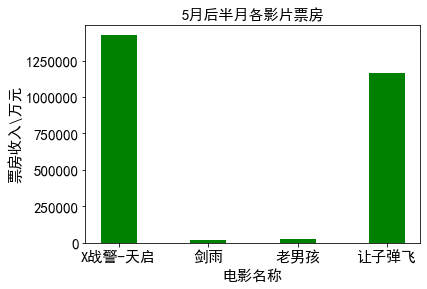

In [31]:
# 导入画图包
import matplotlib.pyplot as plt
plt.ticklabel_format(axis="both", style="plain", scilimits=None)

# 设置中文字体为SimHei，简黑字体 
plt.rcParams['font.sans-serif'] = ['SimHei']

# 解决负号显示的问题
plt.rcParams['axes.unicode_minus'] = False

# 画柱状图，x、y轴分别为电影名和票房，并设置每根柱子颜色为绿色，宽度为0.4
plt.bar(filmgrp_bor['filmname'],filmgrp_bor['BOR'], color = 'green', width = 0.4)

# 设置标题
plt.title('5月后半月各影片票房',size=15)

# 设置x、y轴的标题，x轴为电影名，y轴为票房
plt.xlabel('电影名称',size=15)
plt.ylabel('票房收入\万元',size=15)
plt.tick_params(labelsize=15)

# 显示图像
plt.show()

### 1.4.2 将上述垂直柱状图改为水平柱状图

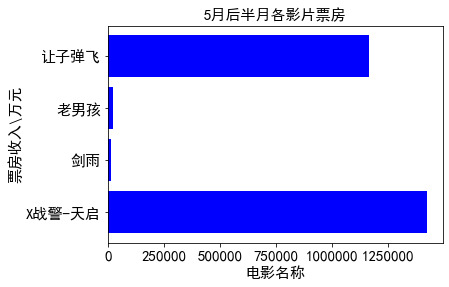

In [35]:
plt.ticklabel_format(axis="both", style="plain", scilimits=None)
# 画柱状图，x、y轴分别为电影名和票房，并设置每根柱子颜色为蓝色
plt.barh(filmgrp_bor['filmname'],filmgrp_bor['BOR'], color = 'blue')

# 设置标题
plt.title('5月后半月各影片票房',size=15)

# 设置x、y轴的标题，x轴为电影名，y轴为票房
plt.xlabel('电影名称',size=15)
plt.ylabel('票房收入\万元',size=15)
plt.tick_params(labelsize=15)

# 显示图像
plt.show()